In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [46]:
# Load dataset
data = pd.read_csv('data_banjir.csv')

# Tampilkan informasi dasar dataset
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"Shape dataset: {data.shape}")
print(f"\nKolom dalam dataset:")
print(data.columns.tolist())
print(f"\n5 baris pertama:")
data.head()


INFORMASI DATASET
Shape dataset: (6308, 15)

Kolom dalam dataset:
['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car', 'station_id', 'station_name', 'region_name', 'flood']

5 baris pertama:


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0


In [47]:
# Informasi statistik dataset
print("=" * 50)
print("INFO DATASET")
print("=" * 50)
data.info()


INFO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


In [48]:
# Statistik deskriptif
print("=" * 50)
print("STATISTIK DESKRIPTIF")
print("=" * 50)
data.describe()


STATISTIK DESKRIPTIF


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


DISTRIBUSI TARGET (FLOOD)
flood
0    5832
1     476
Name: count, dtype: int64

Persentase:
flood
0    92.454027
1     7.545973
Name: proportion, dtype: float64


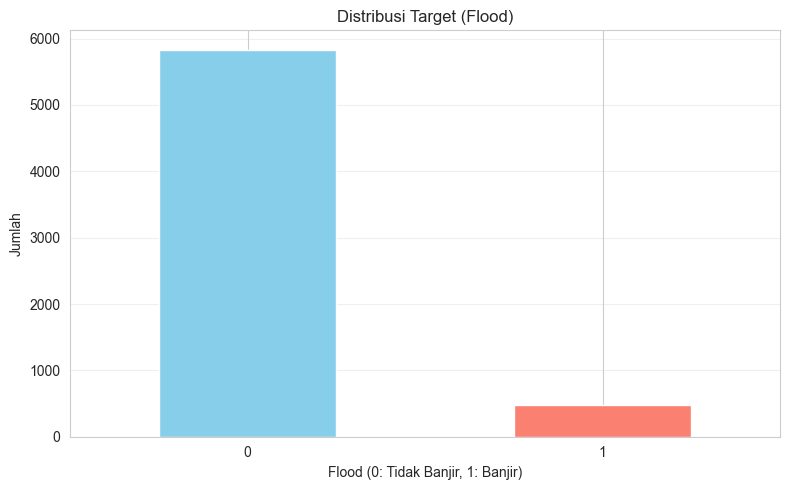

In [49]:
# Cek distribusi target (flood)
print("=" * 50)
print("DISTRIBUSI TARGET (FLOOD)")
print("=" * 50)
print(data['flood'].value_counts())
print(f"\nPersentase:")
print(data['flood'].value_counts(normalize=True) * 100)

# Visualisasi distribusi target
plt.figure(figsize=(8, 5))
data['flood'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Target (Flood)')
plt.xlabel('Flood (0: Tidak Banjir, 1: Banjir)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


CEK MISSING VALUES
  Kolom  Jumlah Missing  Persentase (%)
     RR            2315       36.699429
     ss            1259       19.958782
     Tn             312        4.946100
     Tx             213        3.376665
ddd_car             101        1.601141
 ff_avg              93        1.474318
 RH_avg              52        0.824350
   Tavg              46        0.729233
   ff_x              22        0.348763
  ddd_x              22        0.348763


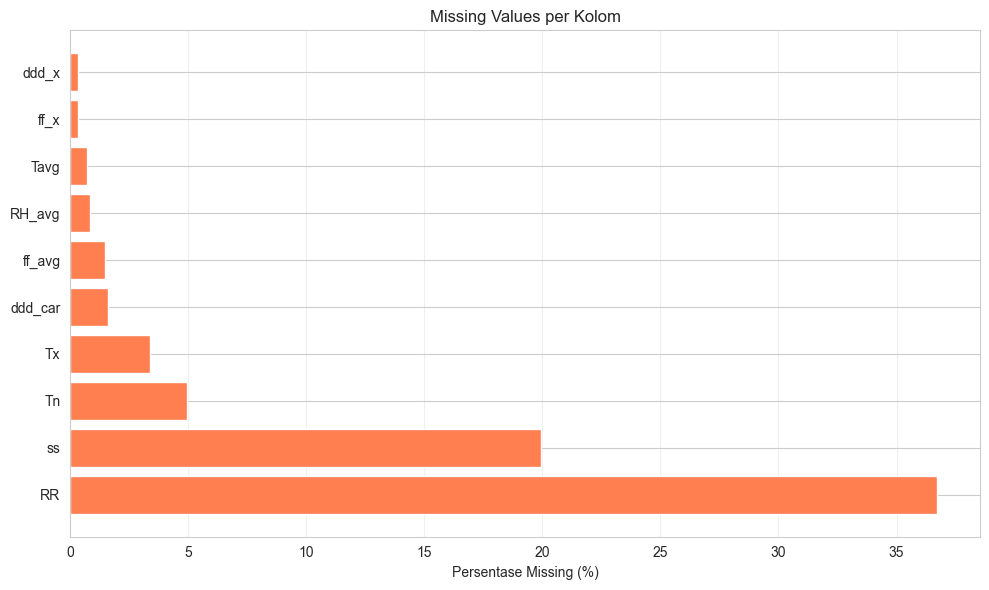

In [50]:
# Cek missing values
print("=" * 50)
print("CEK MISSING VALUES")
print("=" * 50)
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing': missing_values.values,
    'Persentase (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values('Jumlah Missing', ascending=False)
print(missing_df.to_string(index=False))

# Visualisasi missing values
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Kolom'], missing_df['Persentase (%)'], color='coral')
    plt.xlabel('Persentase Missing (%)')
    plt.title('Missing Values per Kolom')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada missing values!")


In [51]:
# Pilih fitur yang akan digunakan
# Berdasarkan analisis, kita akan menggunakan fitur numerik utama
features = ['Tavg', 'RH_avg', 'RR']
target = 'flood'

# Buat dataset untuk modeling
X = data[features].copy()
y = data[target].copy()

print("=" * 50)
print("SEBELUM HANDLING MISSING VALUES")
print("=" * 50)
print(f"Shape X: {X.shape}")
print(f"Missing values di X:")
print(X.isnull().sum())


SEBELUM HANDLING MISSING VALUES
Shape X: (6308, 3)
Missing values di X:
Tavg        46
RH_avg      52
RR        2315
dtype: int64


In [52]:
# Handle missing values dengan median untuk fitur numerik
print("=" * 50)
print("HANDLING MISSING VALUES")
print("=" * 50)

for col in X.columns:
    if X[col].isnull().sum() > 0:
        median_value = X[col].median()
        X[col].fillna(median_value, inplace=True)
        print(f"Kolom {col}: Mengisi {X[col].isnull().sum()} missing values dengan median = {median_value:.2f}")

# Hapus baris yang masih memiliki missing values di target
data_clean = pd.concat([X, y], axis=1).dropna()
X = data_clean[features]
y = data_clean[target]

print(f"\nSetelah cleaning:")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")
print(f"Missing values di X: {X.isnull().sum().sum()}")
print(f"Missing values di y: {y.isnull().sum()}")


HANDLING MISSING VALUES
Kolom Tavg: Mengisi 0 missing values dengan median = 28.40
Kolom RH_avg: Mengisi 0 missing values dengan median = 77.00
Kolom RR: Mengisi 0 missing values dengan median = 1.40

Setelah cleaning:
Shape X: (6308, 3)
Shape y: (6308,)
Missing values di X: 0
Missing values di y: 0


In [53]:
# Cek tipe data
print("=" * 50)
print("ENCODING")
print("=" * 50)
print("Tipe data fitur:")
print(X.dtypes)
print(f"\nTarget sudah numerik: {y.dtype}")

# Karena fitur yang digunakan sudah numerik dan target sudah binary (0/1)
# Tidak perlu encoding tambahan
# Jika ada fitur kategorikal, gunakan LabelEncoder atau OneHotEncoder

print("\n✓ Tidak ada encoding yang diperlukan karena semua fitur sudah numerik")
print(f"Fitur yang digunakan: {features}")
print(f"Target: {target} (sudah binary: 0/1)")


ENCODING
Tipe data fitur:
Tavg      float64
RH_avg    float64
RR        float64
dtype: object

Target sudah numerik: int64

✓ Tidak ada encoding yang diperlukan karena semua fitur sudah numerik
Fitur yang digunakan: ['Tavg', 'RH_avg', 'RR']
Target: flood (sudah binary: 0/1)


In [54]:
# Split data sebelum scaling (untuk menghindari data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 50)
print("SPLIT DATA")
print("=" * 50)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\nDistribusi y_train:")
print(y_train.value_counts())
print(f"\nDistribusi y_test:")
print(y_test.value_counts())


SPLIT DATA
X_train shape: (5046, 3)
X_test shape: (1262, 3)
y_train shape: (5046,)
y_test shape: (1262,)

Distribusi y_train:
flood
0    4665
1     381
Name: count, dtype: int64

Distribusi y_test:
flood
0    1167
1      95
Name: count, dtype: int64


SCALING DATA
Statistik sebelum scaling (X_train):
              Tavg       RH_avg           RR
count  5046.000000  5046.000000  5046.000000
mean     28.334324    76.934403     6.566686
std       1.928034     8.964497    15.343902
min      23.700000    34.000000     0.000000
25%      27.700000    72.000000     0.300000
50%      28.400000    77.000000     1.400000
75%      29.100000    82.000000     3.800000
max     141.600000   488.000000   277.500000

Statistik setelah scaling (X_train_scaled):
               Tavg        RH_avg            RR
count  5.046000e+03  5.046000e+03  5.046000e+03
mean   3.316148e-16  5.836702e-16 -1.408131e-18
std    1.000099e+00  1.000099e+00  1.000099e+00
min   -2.403891e+00 -4.789857e+00 -4.280096e-01
25%   -3.290331e-01 -5.504930e-01 -4.084559e-01
50%    3.406698e-02  7.318092e-03 -3.367591e-01
75%    3.971671e-01  5.651292e-01 -1.803297e-01
max    5.875254e+01  4.585939e+01  1.765914e+01


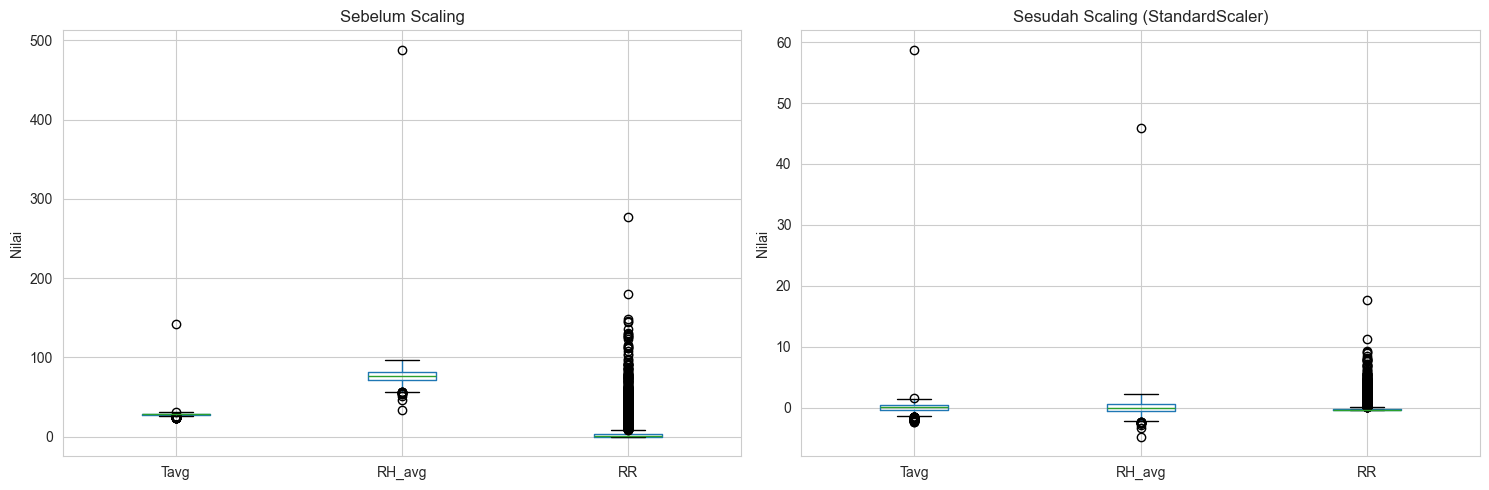

In [55]:
# Scaling menggunakan StandardScaler
print("=" * 50)
print("SCALING DATA")
print("=" * 50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame untuk memudahkan analisis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

print("Statistik sebelum scaling (X_train):")
print(X_train.describe())
print("\nStatistik setelah scaling (X_train_scaled):")
print(X_train_scaled.describe())

# Visualisasi perbandingan sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sebelum scaling
X_train.boxplot(ax=axes[0])
axes[0].set_title('Sebelum Scaling')
axes[0].set_ylabel('Nilai')

# Sesudah scaling
X_train_scaled.boxplot(ax=axes[1])
axes[1].set_title('Sesudah Scaling (StandardScaler)')
axes[1].set_ylabel('Nilai')

plt.tight_layout()
plt.show()


In [56]:
# Bangun model ANN
print("=" * 50)
print("MEMBANGUN MODEL ANN")
print("=" * 50)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Dropout untuk mengurangi overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid untuk binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Tampilkan summary model
print("\nArsitektur Model:")
model.summary()


MEMBANGUN MODEL ANN

Arsitektur Model:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Setup Early Stopping untuk mencegah overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Training model dengan menyimpan history
print("=" * 50)
print("TRAINING MODEL")
print("=" * 50)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

print("\n✓ Training selesai!")


TRAINING MODEL
Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.3409 - val_accuracy: 0.9247 - val_loss: 0.2568
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9237 - loss: 0.2279 - val_accuracy: 0.9192 - val_loss: 0.2520
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9245 - loss: 0.2205 - val_accuracy: 0.9279 - val_loss: 0.2493
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.2181 - val_accuracy: 0.9208 - val_loss: 0.2459
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.2162 - val_accuracy: 0.9287 - val_loss: 0.2476
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.2175 - val_accuracy: 0.9255 - val_loss: 0.2419
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2168 - val_accuracy: 0.9271 - val_loss: 0.2427
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.

In [58]:
# Evaluasi model
print("=" * 50)
print("EVALUASI MODEL")
print("=" * 50)

train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


EVALUASI MODEL
Training Accuracy: 0.9263
Training Loss: 0.2093
Test Accuracy: 0.9279
Test Loss: 0.2347


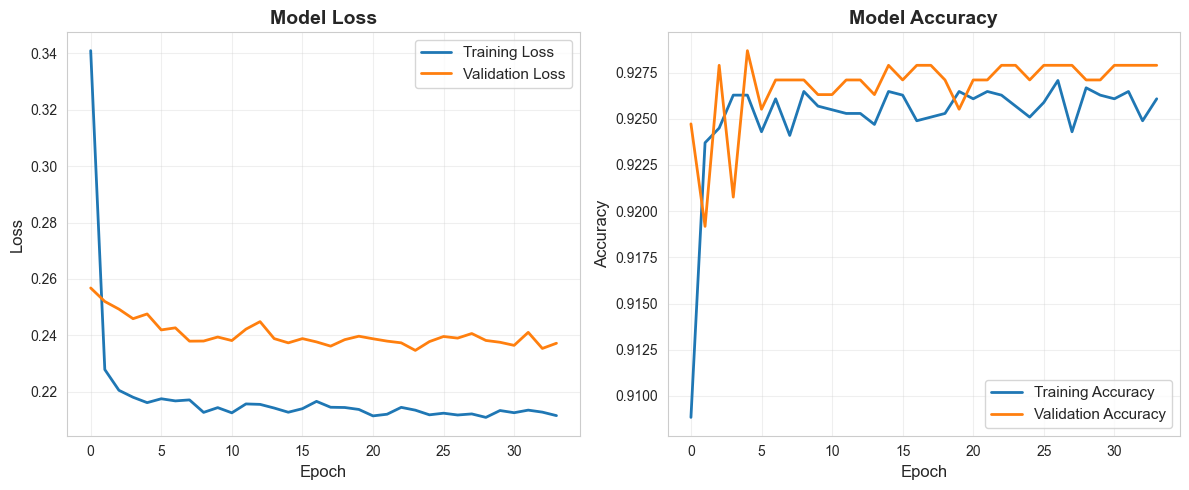

In [59]:
# Visualisasi Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Visualisasi Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


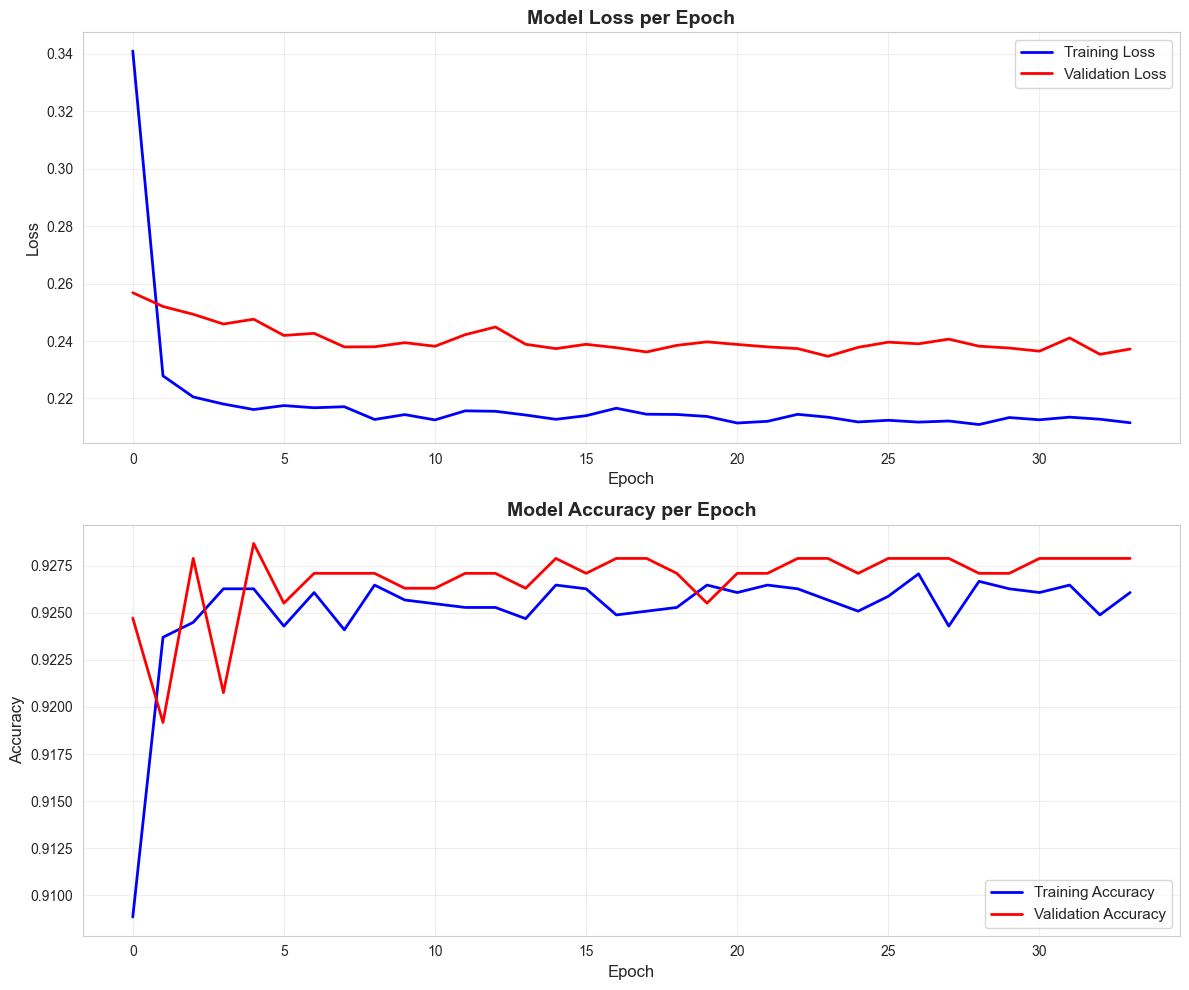

In [60]:
# Visualisasi gabungan Loss dan Accuracy dalam satu plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
axes[0].set_title('Model Loss per Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
axes[1].set_title('Model Accuracy per Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [61]:
# Prediksi pada data test
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("=" * 50)
print("PREDIKSI MODEL")
print("=" * 50)
print(f"Contoh 10 prediksi pertama:")
print(f"Actual: {y_test.values[:10]}")
print(f"Predicted: {y_pred[:10]}")
print(f"Probability: {y_pred_proba[:10].flatten()}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
PREDIKSI MODEL
Contoh 10 prediksi pertama:
Actual: [0 0 0 0 1 0 0 0 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0]
Probability: [0.16345187 0.03300809 0.0066283  0.14123371 0.01830963 0.00619197
 0.02516767 0.07104615 0.01366742 0.07349759]


CONFUSION MATRIX

Confusion Matrix:
[[1166    1]
 [  90    5]]


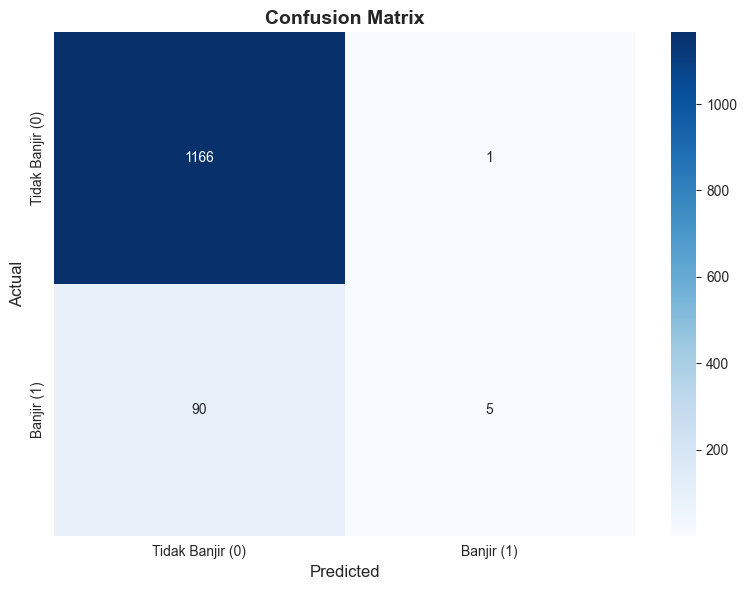


True Negative (TN): 1166
False Positive (FP): 1
False Negative (FN): 90
True Positive (TP): 5


In [62]:
# Confusion Matrix
print("=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Tidak Banjir (0)', 'Banjir (1)'],
            yticklabels=['Tidak Banjir (0)', 'Banjir (1)'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Hitung metrik dari confusion matrix
TN, FP, FN, TP = cm.ravel()
print(f"\nTrue Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


In [63]:
# Classification Report
print("=" * 50)
print("CLASSIFICATION REPORT")
print("=" * 50)
print("\n", classification_report(y_test, y_pred, target_names=['Tidak Banjir', 'Banjir']))

# Metrik tambahan
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")


CLASSIFICATION REPORT

               precision    recall  f1-score   support

Tidak Banjir       0.93      1.00      0.96      1167
      Banjir       0.83      0.05      0.10        95

    accuracy                           0.93      1262
   macro avg       0.88      0.53      0.53      1262
weighted avg       0.92      0.93      0.90      1262


Accuracy Score: 0.9279


In [64]:
# Analisis Overfitting
print("=" * 50)
print("ANALISIS OVERFITTING")
print("=" * 50)

# Hitung perbedaan antara training dan validation
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

loss_diff = final_train_loss - final_val_loss
acc_diff = final_train_acc - final_val_acc

print(f"\nTraining Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")
print(f"Selisih Loss: {loss_diff:.4f}")

print(f"\nTraining Accuracy: {final_train_acc:.4f}")
print(f"Validation Accuracy: {final_val_acc:.4f}")
print(f"Selisih Accuracy: {acc_diff:.4f}")

# Analisis
print("\n" + "=" * 50)
print("KESIMPULAN:")
print("=" * 50)

if abs(loss_diff) < 0.1 and abs(acc_diff) < 0.05:
    print("✓ Model TIDAK mengalami overfitting")
    print("  - Training dan validation metrics sangat dekat")
    print("  - Model generalisasi dengan baik")
elif final_train_loss < final_val_loss and final_train_acc > final_val_acc:
    print("⚠ Model mengalami OVERFITTING")
    print("  - Training loss lebih rendah dari validation loss")
    print("  - Training accuracy lebih tinggi dari validation accuracy")
    print("  - Model terlalu menghafal data training")
else:
    print("✓ Model dalam kondisi baik")
    print("  - Perbedaan metrics masih dalam batas wajar")


ANALISIS OVERFITTING

Training Loss: 0.2115
Validation Loss: 0.2372
Selisih Loss: -0.0257

Training Accuracy: 0.9261
Validation Accuracy: 0.9279
Selisih Accuracy: -0.0018

KESIMPULAN:
✓ Model TIDAK mengalami overfitting
  - Training dan validation metrics sangat dekat
  - Model generalisasi dengan baik


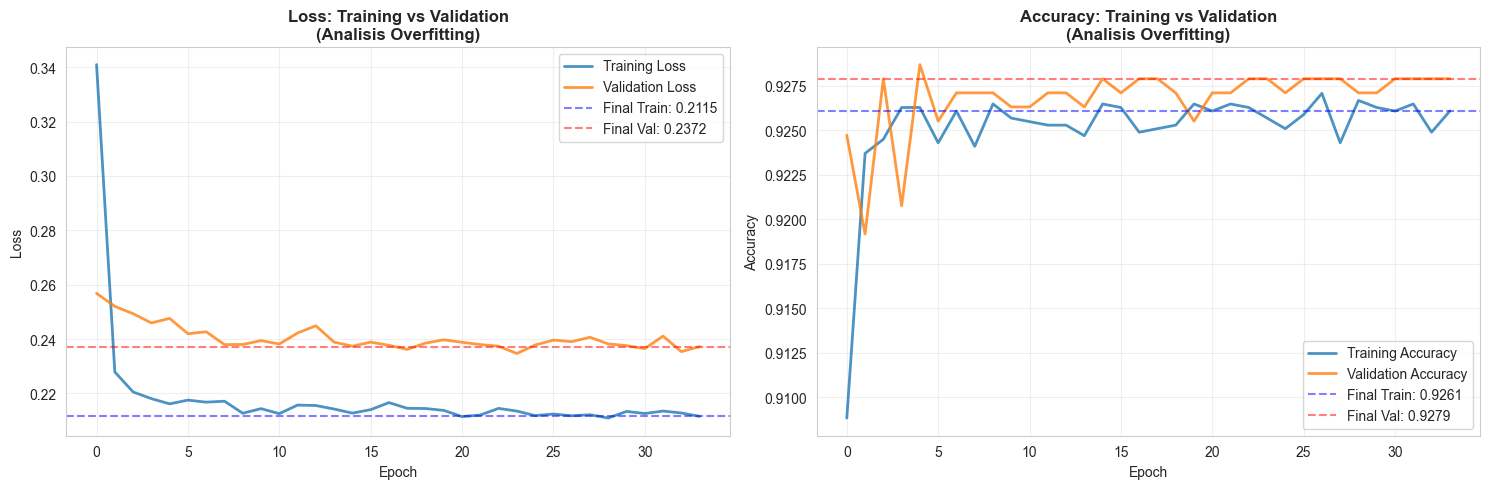

In [65]:
# Visualisasi perbandingan Training vs Validation untuk analisis overfitting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss comparison
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, alpha=0.8)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, alpha=0.8)
axes[0].axhline(y=final_train_loss, color='blue', linestyle='--', alpha=0.5, label=f'Final Train: {final_train_loss:.4f}')
axes[0].axhline(y=final_val_loss, color='red', linestyle='--', alpha=0.5, label=f'Final Val: {final_val_loss:.4f}')
axes[0].set_title('Loss: Training vs Validation\n(Analisis Overfitting)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy comparison
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, alpha=0.8)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, alpha=0.8)
axes[1].axhline(y=final_train_acc, color='blue', linestyle='--', alpha=0.5, label=f'Final Train: {final_train_acc:.4f}')
axes[1].axhline(y=final_val_acc, color='red', linestyle='--', alpha=0.5, label=f'Final Val: {final_val_acc:.4f}')
axes[1].set_title('Accuracy: Training vs Validation\n(Analisis Overfitting)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


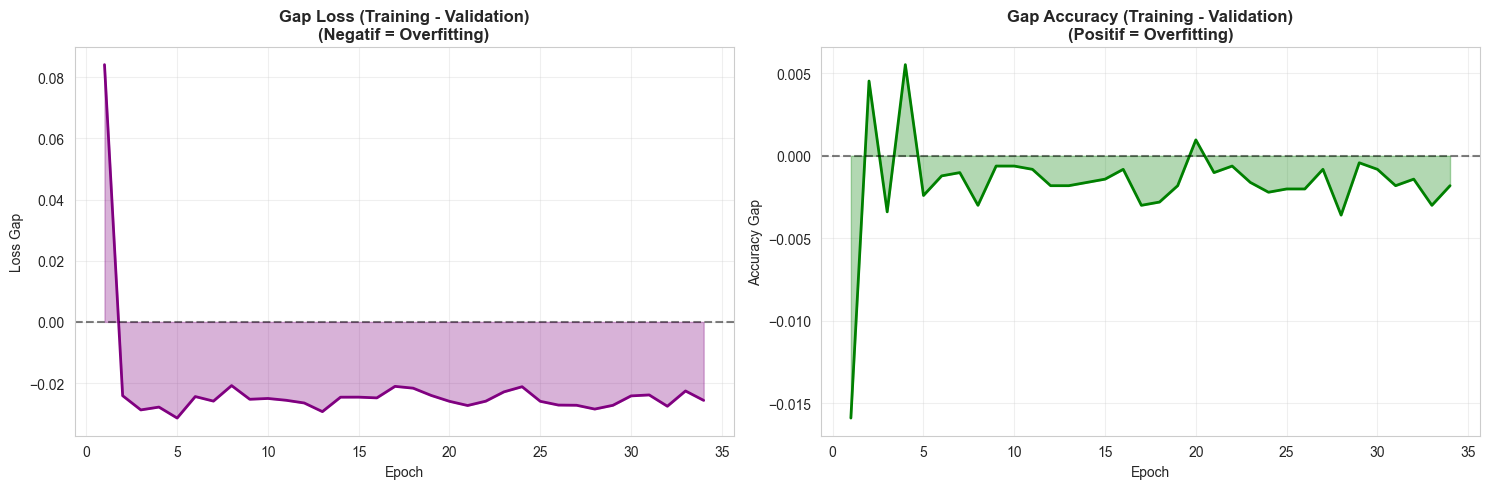


Gap Loss rata-rata: -0.0222
Gap Accuracy rata-rata: -0.0017


In [66]:
# Hitung gap antara training dan validation
epochs = range(1, len(history.history['loss']) + 1)
loss_gap = [train - val for train, val in zip(history.history['loss'], history.history['val_loss'])]
acc_gap = [train - val for train, val in zip(history.history['accuracy'], history.history['val_accuracy'])]

# Visualisasi gap
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(epochs, loss_gap, linewidth=2, color='purple')
axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0].fill_between(epochs, loss_gap, 0, alpha=0.3, color='purple')
axes[0].set_title('Gap Loss (Training - Validation)\n(Negatif = Overfitting)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss Gap')
axes[0].grid(True, alpha=0.3)

axes[1].plot(epochs, acc_gap, linewidth=2, color='green')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].fill_between(epochs, acc_gap, 0, alpha=0.3, color='green')
axes[1].set_title('Gap Accuracy (Training - Validation)\n(Positif = Overfitting)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy Gap')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nGap Loss rata-rata: {np.mean(loss_gap):.4f}")
print(f"Gap Accuracy rata-rata: {np.mean(acc_gap):.4f}")


### 4.1. Menyimpan Model dan Scaler


In [67]:
# Simpan model dan scaler untuk digunakan di aplikasi web
import joblib

print("=" * 50)
print("MENYIMPAN MODEL DAN SCALER")
print("=" * 50)

# Simpan model
model.save('model_banjir.h5')
print("✓ Model berhasil disimpan sebagai 'model_banjir.h5'")

# Simpan scaler
joblib.dump(scaler, 'scaler.save')
print("✓ Scaler berhasil disimpan sebagai 'scaler.save'")

print("\nModel dan scaler siap digunakan untuk prediksi di aplikasi web!")


MENYIMPAN MODEL DAN SCALER
✓ Model berhasil disimpan sebagai 'model_banjir.h5'
✓ Scaler berhasil disimpan sebagai 'scaler.save'

Model dan scaler siap digunakan untuk prediksi di aplikasi web!
